In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Create a new column called season based on order_month:

Dec–Feb → "Winter"

Mar–May → "Spring"

Jun–Aug → "Summer"

Sep–Nov → "Autumn"

Then show total sales_amount by season and customer_segment (use a grouped bar plot).

In [3]:
# Dec - Feb = [12,1,2]-winter
# mar - may =[3,4,5] - spring
# jun - aug = [6,7,8] - summer
# sep-Nov = [9,10,11] - autumn

In [4]:
# Approach - 1
season_dict={
    12:'Winter',1:'Winter',2:'Winter',
    3:'Spring',4:'Spring',5:'Spring',
    6:"Summer",7:"Summer",8:"Summer",
    9:"Autumn",10:"Autumn",11:"Autumn",
}
df['season']=df['order_month'].map(season_dict)

In [5]:
# Approach - 2
condition=[
    df['order_month'].isin([1,2,12]),
    df['order_month'].isin([3,4,5]),
    df['order_month'].isin([6,7,8]),
    df['order_month'].isin([9,10,11]),
]
choice=['Winter','Spring','Summer','Autumn']
df['season']=np.select(condition,choice,default='Unknown')
df

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week,season
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.4480,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday,Winter
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.4390,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday,Winter
2,2,2,ORD100379,2020-01-17,NaN,CUST10079,Divya Kulkarni,24,Female,Consumer,North,Punjab,Amritsar,PROD2195,Nilkamal Study Tables,Furniture,Study Tables,Nilkamal,25174.95,4,25,25174.95,75524.85,0.1664,12567.67,0.12,9062.98,0.00,Standard,84587.83,Net Banking,7,Processing,NaN,No,2020,1,Q1,Friday,Winter
3,3,3,ORD100031,2020-01-19,2020-01-23,CUST10152,Kavita Reddy,64,Female,Consumer,Central,Madhya Pradesh,Indore,PROD9901,Puma Jackets,Clothing,Jackets,Puma,2906.00,4,0,0.00,11624.01,0.3756,4366.35,0.12,1394.88,128.97,Standard,13147.86,UPI,4,Delivered,4.0,No,2020,1,Q1,Sunday,Winter
4,4,4,ORD100960,2020-01-26,2020-01-29,CUST10164,Rahul Verma,62,Male,Consumer,South,Telangana,Hyderabad,PROD4385,Hometown Curtains,Home Decor,Curtains,Hometown,8735.04,3,5,1310.26,24894.87,0.2495,6211.20,0.12,2987.38,142.58,Standard,28024.83,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Sunday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1003,ORD100626,2024-09-22,NaN,CUST10266,Karan Verma,31,Male,Corporate,Central,Madhya Pradesh,Gwalior,PROD6582,Nilkamal Wardrobes,Furniture,Wardrobes,Nilkamal,17220.98,4,20,13776.79,55107.15,0.2053,11311.06,0.12,6612.86,0.00,Standard,61720.01,Credit Card,7,Shipped,NaN,Yes,2024,9,Q3,Sunday,Autumn
996,996,1004,ORD100886,2024-09-23,2024-09-24,CUST10129,Priya Iyer,36,Male,Consumer,Central,Chhattisgarh,Raipur,PROD3819,Levis Dresses,Clothing,Dresses,Levis,674.64,1,15,101.20,573.45,0.3571,204.80,0.12,68.81,118.56,Express,760.82,Debit Card,1,Delivered,3.5,Yes,2024,9,Q3,Monday,Autumn
997,997,1005,ORD100504,2024-09-25,NaN,CUST10020,Meera Gupta,63,Female,Corporate,South,Telangana,Hyderabad,PROD4421,Adidas Dresses,Clothing,Dresses,Adidas,1486.49,1,30,445.95,1040.54,0.2345,243.97,0.12,124.86,77.22,Economy,1242.62,Credit Card,5,Shipped,NaN,Yes,2024,9,Q3,Wednesday,Autumn
998,998,1006,ORD100776,2024-09-29,NaN,CUST10068,Divya Reddy,32,Female,Consumer,West,Maharashtra,Mumbai,PROD4546,Zara Jeans,Clothing,Jeans,Zara,4056.65,3,25,3042.49,9127.47,0.3081,2812.36,0.12,1095.30,35.07,Economy,10257.84,EMI,9,Shipped,NaN,Yes,2024,9,Q3,Sunday,Autumn


### Visualization

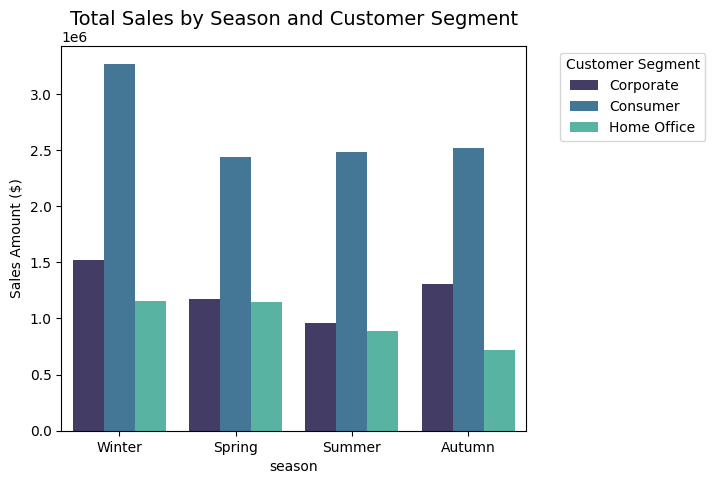

In [6]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=df,
    x='season',
    y='sales_amount',
    estimator='sum',
    hue='customer_segment',
    errorbar=None,
    palette='mako',
)

plt.legend(
    bbox_to_anchor=(1.4,1),
    title='Customer Segment'
)
plt.title('Total Sales by Season and Customer Segment', fontsize=14, pad=15)
plt.ylabel('Sales Amount ($)')

plt.show()